In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from IPython.display import display
from sklearn.svm import SVC
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

In [4]:
dfs = []
for i in range(1,5):
    path = 'UNSW-NB15_{}.csv'  # 4 csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
main_ds = pd.concat(dfs).reset_index(drop=True)  # concat all to single ds

C:\Users\joech\AppData\Local\Temp\ipykernel_19232\3646423395.py:4: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
C:\Users\joech\AppData\Local\Temp\ipykernel_19232\3646423395.py:4: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [5]:
main_ds # print all data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [6]:
features_ds = pd.read_csv('UNSW_features.csv', encoding = 'ISO-8859-1') # features ds

In [7]:
features_ds['Name'] = features_ds['Name'].apply(lambda x: x.strip().replace(' ', '').lower()) # lower case column names and removing spaces

In [8]:
features_ds.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [9]:
main_ds.columns = features_ds['Name'] #adding features headings to the main dataset

In [10]:
main_ds.shape

(2540047, 49)

In [11]:
main_ds.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [12]:
train, test = train_test_split(main_ds, test_size=0.3, random_state=16) # splitting ds into training and testing sets
del main_ds # deleting main ds as its not needed

In [13]:
train.shape # size of training ds

(1778032, 49)

In [14]:
test.shape # size of testing ds

(762015, 49)

In [15]:
train.isnull().sum() # checking for null values

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [16]:
train['ct_flw_http_mthd'] = train.ct_flw_http_mthd.fillna(value=0) # changing all null values in this column to 0
train['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     1634363
1.0      131643
6.0        5536
4.0        4683
3.0         508
2.0         409
5.0         287
9.0         172
14.0        169
12.0         95
30.0         40
8.0          36
16.0         32
36.0         25
10.0         18
25.0         16
Name: count, dtype: int64

In [17]:
train['is_ftp_login'] = train.is_ftp_login.fillna(value=0) # changing all null values in this column to 0
train['is_ftp_login'].value_counts()

is_ftp_login
0.0    1747573
1.0      30329
4.0        109
2.0         21
Name: count, dtype: int64

In [18]:
train['attack_cat'] = train.attack_cat.fillna(value='normal') # changing all null values in this column to 'normal'
train['attack_cat'].value_counts()

attack_cat
normal              1552862
Generic              150906
Exploits              31507
 Fuzzers              13345
DoS                   11433
 Reconnaissance        8544
 Fuzzers               3569
Analysis               1855
Backdoor               1242
Reconnaissance         1220
 Shellcode              904
Backdoors               374
Shellcode               151
Worms                   120
Name: count, dtype: int64

In [19]:
train.isnull().sum() # checking for null values again

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [20]:
train.dtypes # checking column datatypes

Name
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
stime                 int64
ltime                 int64
sintpkt             float64
dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports

In [21]:
num_col = train.select_dtypes(include='number').columns # getting a list of numerical and categorical columns
cat_col = train.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col  

Index(['ct_ftp_cmd', 'dsport', 'dstip', 'proto', 'service', 'sport', 'srcip',
       'state'],
      dtype='object', name='Name')

In [22]:
train['ct_ftp_cmd'] = train['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int) # this is numerical but it has spaces so removing spaces and converting it to numerical

In [23]:
print(train['is_sm_ips_ports'].value_counts()) # stated as a binary type so checking values

is_sm_ips_ports
0    1775116
1       2916
Name: count, dtype: int64


In [24]:
print(train['is_ftp_login'].value_counts()) # binary column but contains values of 2 and 4

is_ftp_login
0.0    1747573
1.0      30329
4.0        109
2.0         21
Name: count, dtype: int64


In [25]:
train['is_ftp_login'] = train['is_ftp_login'].replace([2, 4], 1) # changing values of 2 and 4 to 1
train['is_ftp_login'].value_counts()

is_ftp_login
0.0    1747573
1.0      30459
Name: count, dtype: int64

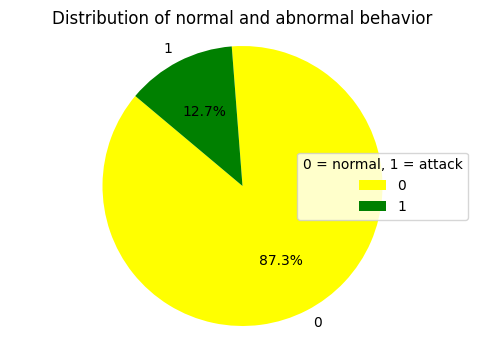

In [26]:
cat = train['label']
cat_count = cat.value_counts()
plt.figure(figsize = (6,4))
plt.pie(cat_count, labels = cat_count.index, autopct = '%1.1f%%', startangle = 140, colors = ['yellow', 'green'])
plt.title('Distribution of normal and abnormal behavior')
plt.axis('equal')
plt.legend(title = '0 = normal, 1 = attack')
plt.show()

C:\Users\joech\AppData\Local\Temp\ipykernel_19232\3779284462.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colour_map = plt.cm.get_cmap('tab10', len(cat2_count))


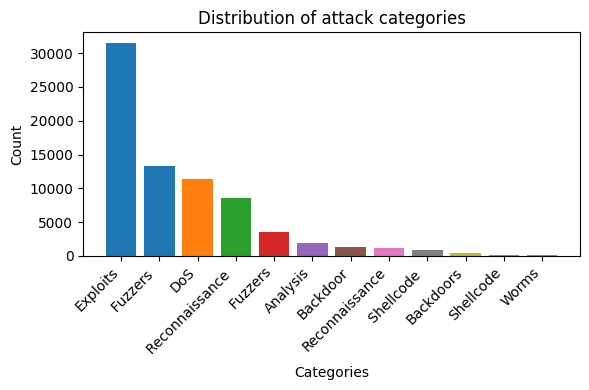

In [27]:
filter = train[~train['attack_cat'].isin(['normal', 'Generic'])]
cat2 = filter['attack_cat']
cat2_count = cat2.value_counts()
colour_map = plt.cm.get_cmap('tab10', len(cat2_count))
colours = [colour_map(i) for i in range(len(cat2_count))]
plt.figure(figsize = (6,4))
values = np.arange(len(cat2_count))
plt.bar(values, cat2_count, color = colours)
plt.xticks(values, cat2_count.index, rotation=45, ha='right')
plt.title('Distribution of attack categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Bar chart of the different attacks used in the dataset without the 'generic' and 'normal' categories as they take up the majority of the network behavior. Just a visualisation of the distribution of unique attacks used.

***
categorical data = 'proto', 'state', 'service' <br>
numerical data = everything else except 'attack_cat' and 'label' which is the target data
***

In [28]:
encoder = LabelEncoder()

In [29]:
encoder.fit(train['proto'])
train.proto = encoder.transform(train.proto) # encoding the proto column

In [30]:
encoder.fit(train['state'])
train.state = encoder.transform(train.state) # encoding the state column

In [31]:
train['service'] = train['service'].replace('-', 'none') # replacing all the - entries in service to none
encoder.fit(train['service'])
train.service = encoder.transform(train.service) # encoding the service column

In [32]:
train.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
81030,175.45.176.0,5060,149.171.126.18,4569,120,6,0.100437,178,0,254,...,0,2,2,1,1,1,1,1,normal,0
1969394,149.171.126.15,1043,175.45.176.3,53,120,6,0.000008,264,0,60,...,0,20,20,16,16,16,8,20,normal,0
541834,59.166.0.8,15265,149.171.126.8,13292,114,5,0.014842,2542,23122,31,...,0,18,6,3,4,1,1,1,normal,0
1070955,59.166.0.1,4951,149.171.126.9,21,114,5,0.807553,2934,3740,31,...,1,1,2,5,2,1,1,2,normal,0
863423,59.166.0.9,11505,149.171.126.3,6881,114,5,0.018598,1540,1644,31,...,0,8,8,10,10,6,1,7,normal,0


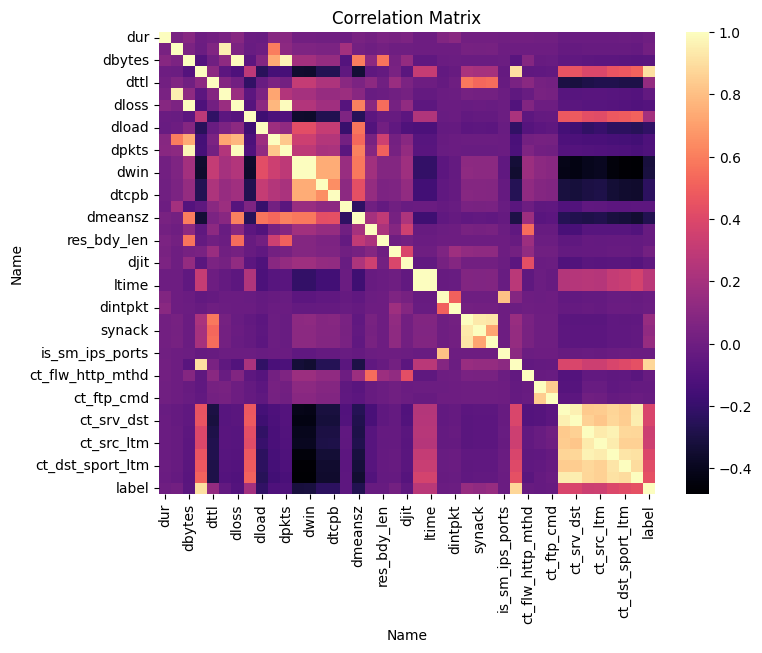

In [33]:
num_col = list(train.select_dtypes(include='number').columns) # creates a list of numerical data excluding the previous categorical columns
num_col.remove('proto')
num_col.remove('state')
num_col.remove('service')

train_matrix = train[num_col].corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_matrix, cmap='magma', annot=False) # creates corrleation matrix of numerical data
plt.title('Correlation Matrix')
plt.show()

In [34]:
threshold = 0.9

def high_cor_features(df): # function to find highly correlated features using the correlation matrix
    cor = df[num_col].corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor)

high_cor_features(train_matrix[num_col])

max corr: 0.9999999999746685 , min corr:  -0.9020883590430406


Name            Name            
stime           ltime               1.000000
swin            dwin                0.999966
ct_srv_dst      ct_srv_src          0.999575
ct_src_ltm      ct_dst_ltm          0.999240
ct_dst_ltm      ct_src_dport_ltm    0.998279
                                      ...   
swin            ct_src_dport_ltm   -0.887028
dwin            ct_dst_sport_ltm   -0.900535
swin            ct_dst_sport_ltm   -0.900967
ct_dst_src_ltm  dwin               -0.901813
                swin               -0.902088
Length: 820, dtype: float64

In [35]:
train.drop(['srcip', 'sport', 'dstip', 'dsport', 'attack_cat'], axis=1, inplace=True) # these columns aren't necessary so removing them
train.drop(['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_src_ltm'], axis=1, inplace=True) # removing high correlated features

In [36]:
# creating x and y set from the dataset
x_train, y_train = train.drop(columns=['label']), train['label']
x_test, y_test = test.drop(columns=['label']), test['label']

In [37]:
num_col = x_train.select_dtypes(include='number').columns # finding numerical columns
num_col

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'service',
       'sload', 'dload', 'spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'ct_dst_sport_ltm'],
      dtype='object', name='Name')

In [38]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col]) # scaling numerical columns
x_train.head()

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm
81030,0.472205,1.017361,-0.040939,-0.075667,-0.227435,2.561444,-0.717760,0.680873,-0.311536,-0.579909,...,-0.123848,-0.04053,2.541751,-0.198264,-0.132020,-0.111699,-0.665012,-0.666629,-0.719387,-0.419757
1969394,0.472205,1.017361,-0.048315,-0.074104,-0.227435,-0.037542,-0.717760,-1.278447,0.801004,-0.579909,...,-0.123848,-0.04053,-0.382468,-0.198264,-0.132020,-0.111699,0.996846,1.172325,1.109976,0.714379
541834,-0.153647,0.317536,-0.047225,-0.032700,-0.083095,-0.426051,-0.041365,0.680873,-0.300363,2.301677,...,-0.118110,-0.04053,-0.382468,-0.198264,-0.132020,-0.111699,0.812195,-0.421435,-0.353515,-0.419757
1070955,-0.153647,0.317536,0.010996,-0.025576,-0.204088,-0.426051,-0.041365,-0.886583,-0.311386,-0.571296,...,-0.117296,-0.04053,-0.382468,-0.198264,7.574602,5.349858,-0.757337,-0.176241,-0.597430,-0.419757
863423,-0.153647,0.317536,-0.046950,-0.050912,-0.217172,-0.426051,-0.041365,0.680873,-0.306391,-0.421690,...,-0.118624,-0.04053,-0.382468,-0.198264,-0.132020,-0.111699,-0.111059,0.436744,0.378231,-0.419757


In [39]:
display(x_train.shape, y_train.shape)
display(x_test.shape, y_test.shape)

(1778032, 35)

(1778032,)

(762015, 48)

(762015,)

In [40]:
# all the processes that were done on the train dataset needs to be done on the test dataset
x_test['ct_flw_http_mthd'] = x_test.ct_flw_http_mthd.fillna(value=0)
x_test['is_ftp_login'] = x_test.is_ftp_login.fillna(value=0) 
x_test['attack_cat'] = x_test.attack_cat.fillna(value='normal')
x_test['ct_ftp_cmd'] = x_test['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)
x_test['is_ftp_login'] = x_test['is_ftp_login'].replace([2, 4], 1)

encoder = LabelEncoder()
encoder.fit(x_test['proto'])
x_test.proto = encoder.transform(x_test.proto)
encoder.fit(x_test['state'])
x_test.state = encoder.transform(x_test.state)
x_test['service'] = x_test['service'].replace('-', 'none')
encoder.fit(x_test['service'])
x_test.service = encoder.transform(x_test.service)

x_test.drop(['srcip', 'sport', 'dstip', 'dsport', 'attack_cat'], axis=1, inplace=True)
x_test.drop(['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_src_ltm'], axis=1, inplace=True)

num_col = x_test.select_dtypes(include='number').columns
scaler = StandardScaler()
scaler = scaler.fit(x_test[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

x_test.head()

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm
752174,0.474974,-1.782573,-0.045137,-0.070401,-0.222056,-0.425555,-0.040919,-1.278129,-0.306769,-0.418288,...,-0.114507,-0.041003,-0.381941,-0.196831,-0.132339,-0.111094,-0.665142,-0.543501,-0.475355,-0.420277
328310,0.474974,-1.782573,-0.045139,-0.070401,-0.222056,-0.425555,-0.040919,-1.278129,-0.306632,-0.413619,...,-0.114507,-0.041003,-0.381941,-0.196831,-0.132339,-0.111094,-0.388633,-0.054157,-0.475355,-0.420277
1429547,0.474974,1.018138,-0.045208,-0.068419,-0.223147,-0.036669,-0.718553,-1.278129,0.678415,-0.580561,...,-0.114507,-0.041003,-0.381941,-0.196831,-0.132339,-0.111094,2.007773,2.270228,2.201744,3.463277
528257,-0.157853,0.317960,-0.044858,-0.006989,-0.208096,-0.425555,-0.040919,0.679612,-0.262714,0.276018,...,-0.108495,-0.041003,-0.381941,-0.196831,-0.132339,-0.111094,-0.204294,-0.054157,-0.110296,-0.420277
1810467,0.474974,-1.782573,-0.045131,-0.070401,-0.222056,-0.425555,-0.040919,-1.278129,-0.307175,-0.432168,...,-0.114507,-0.041003,-0.381941,-0.196831,-0.132339,-0.111094,-0.572972,-0.665837,-0.597041,-0.420277


In [41]:
display(x_train.shape, y_train.shape)
display(x_test.shape, y_test.shape)

(1778032, 35)

(1778032,)

(762015, 35)

(762015,)

In [42]:
all(x_train.columns == x_test.columns) # checking to see if the amount of columns match

True

## Random Forest Classifier

In [212]:
start_time = time.time() # initialize start time
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train) # traning model
end_time = time.time() # initialize end time

In [213]:
predictions = rf_classifier.predict(x_test) # creating predictions

In [214]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions)) # confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions)) # classification report
print("Accuracy:",metrics.accuracy_score(y_test, predictions)) # accuracy
print("Recall:",metrics.recall_score(y_test, predictions)) # recall
print("Precision:",metrics.precision_score(y_test, predictions)) # precision
print("F1 score:",metrics.f1_score(y_test, predictions)) # f1 score
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

Confusion Matrix:
[[658292   7610]
 [   571  95542]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    665902
           1       0.93      0.99      0.96     96113

    accuracy                           0.99    762015
   macro avg       0.96      0.99      0.98    762015
weighted avg       0.99      0.99      0.99    762015

Accuracy: 0.9892639908663216
Recall: 0.9940590762956104
Precision: 0.926225376143943
F1 score: 0.9589441196396759
Training time:  300.6263256072998 seconds


In [215]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
752174,0,0
328310,0,0
1429547,0,0
528257,0,0
1810467,0,0
...,...,...
1767702,0,0
1988213,0,0
2180485,0,0
1644514,1,1


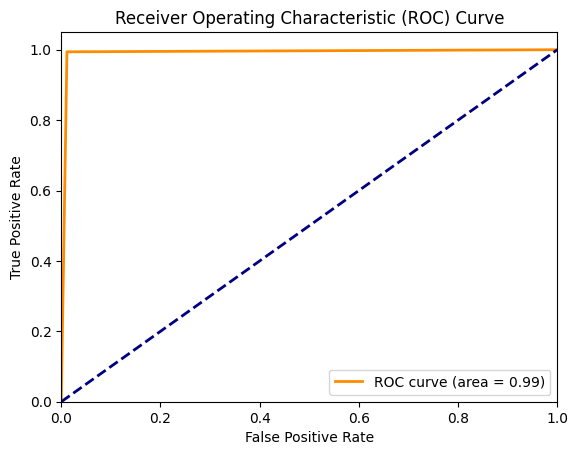

In [216]:
fpr, tpr, thresholds = roc_curve(y_test, predictions) # calculate roc metrics
roc_auc = auc(fpr, tpr)

plt.figure() # plot roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [217]:
start_time = time.time()
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train) # training model
end_time = time.time()

In [218]:
predictions = logistic_regression.predict(x_test) # creating predictions

In [219]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions)) # confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions)) # classification report
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("F1 score:",metrics.f1_score(y_test, predictions))
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

Confusion Matrix:
[[657807   8095]
 [  2268  93845]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    665902
           1       0.92      0.98      0.95     96113

    accuracy                           0.99    762015
   macro avg       0.96      0.98      0.97    762015
weighted avg       0.99      0.99      0.99    762015

Accuracy: 0.9864005301732905
Recall: 0.976402775899202
Precision: 0.9205905434569355
F1 score: 0.9476756221819412
Training time:  12.546411991119385 seconds


In [220]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
752174,0,0
328310,0,0
1429547,0,0
528257,0,0
1810467,0,0
...,...,...
1767702,0,0
1988213,0,0
2180485,0,0
1644514,1,1


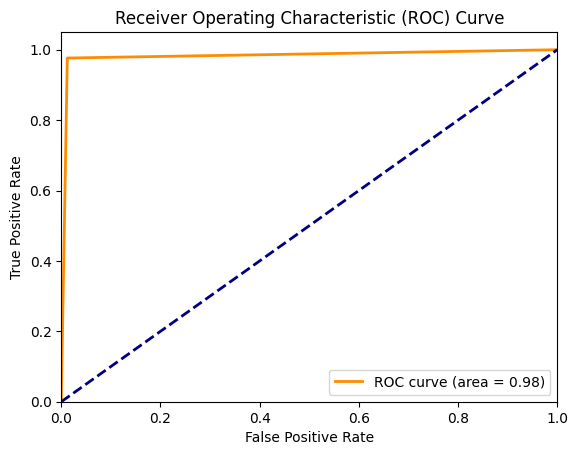

In [221]:
fpr, tpr, thresholds = roc_curve(y_test, predictions) # calculate roc metrics
roc_auc = auc(fpr, tpr)

plt.figure() # plot roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting Classifier

In [222]:
start_time = time.time()
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(x_train, y_train) # training model
end_time = time.time()

In [223]:
predictions = gbm_classifier.predict(x_test) # creating predictions

In [224]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions)) # confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions)) # classification report
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("F1 score:",metrics.f1_score(y_test, predictions))
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

Confusion Matrix:
[[660718   5184]
 [  2070  94043]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    665902
           1       0.95      0.98      0.96     96113

    accuracy                           0.99    762015
   macro avg       0.97      0.99      0.98    762015
weighted avg       0.99      0.99      0.99    762015

Accuracy: 0.9904805023523159
Recall: 0.9784628510191129
Precision: 0.9477561550787588
F1 score: 0.962864748643391
Training time:  1092.0795295238495 seconds


In [225]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
752174,0,0
328310,0,0
1429547,0,0
528257,0,0
1810467,0,0
...,...,...
1767702,0,0
1988213,0,0
2180485,0,0
1644514,1,1


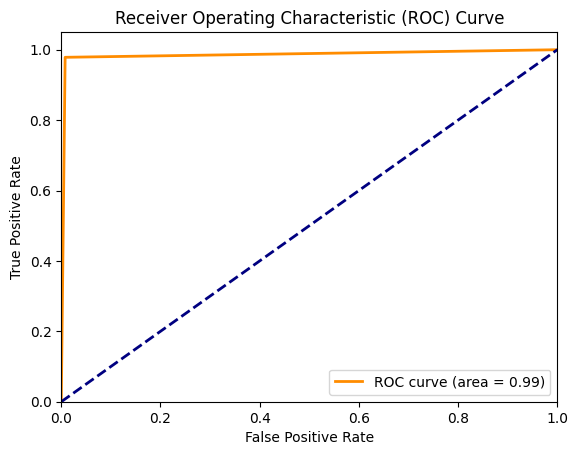

In [226]:
fpr, tpr, thresholds = roc_curve(y_test, predictions) # calculate roc metrics
roc_auc = auc(fpr, tpr)

plt.figure() # plot roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [227]:
start_time = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
end_time = time.time()

In [228]:
predictions = nb_classifier.predict(x_test) # creating predictions

In [229]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions)) # confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions)) # classification report
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("F1 score:",metrics.f1_score(y_test, predictions))
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

Confusion Matrix:
[[664039   1863]
 [ 93364   2749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    665902
           1       0.60      0.03      0.05     96113

    accuracy                           0.88    762015
   macro avg       0.74      0.51      0.49    762015
weighted avg       0.84      0.88      0.82    762015

Accuracy: 0.8750326437143626
Recall: 0.028601750023409943
Precision: 0.5960537727666956
F1 score: 0.05458426408538099
Training time:  1.3710591793060303 seconds


In [230]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
752174,0,0
328310,0,0
1429547,0,0
528257,0,0
1810467,0,0
...,...,...
1767702,0,0
1988213,0,0
2180485,0,0
1644514,1,0


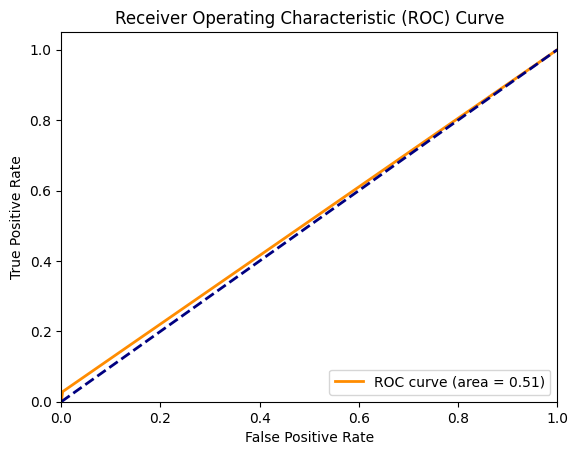

In [231]:
fpr, tpr, thresholds = roc_curve(y_test, predictions) # calculate roc metrics
roc_auc = auc(fpr, tpr)

plt.figure() # plot roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Deep learning, neural network approach

In [232]:
start_time = time.time()
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()

accuracy = model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

C:\Users\joech\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9876 - loss: 0.0270 - val_accuracy: 0.9903 - val_loss: 0.0181
Epoch 2/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.9902 - loss: 0.0190 - val_accuracy: 0.9906 - val_loss: 0.0174
Epoch 3/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.9905 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0186
Epoch 4/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.9909 - loss: 0.0172 - val_accuracy: 0.9904 - val_loss: 0.0185
Epoch 5/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9909 - loss: 0.0178 - val_accuracy: 0.9913 - val_loss: 0.0171
Epoch 6/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9910 - loss: 0.0171 - val_accuracy: 0.9915 - val_loss: 0.0167
Epoch 7/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9912 - loss: 0.0168 - val_accuracy: 0.9914 - val_loss: 0.0170
Epoch 8/10
44451/44451 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 

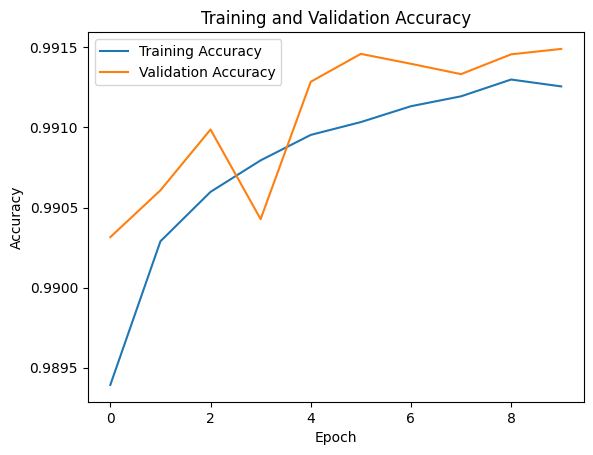

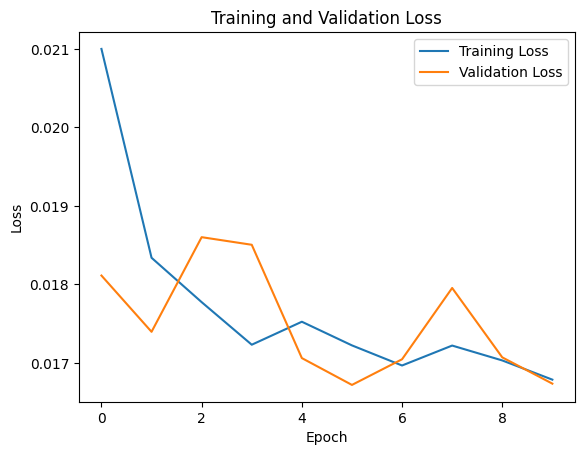

In [233]:
# training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Support Vector Machine

In [43]:
start_time = time.time()
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train, y_train)
end_time = time.time()

In [44]:
predictions = svm_classifier.predict(x_test) # creating predictions

In [45]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions)) # confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions)) # classification report
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("F1 score:",metrics.f1_score(y_test, predictions))
train_time = end_time - start_time # find training time
print("Training time: ", train_time, "seconds")

Confusion Matrix:
[[661118   4784]
 [  2508  93605]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    665902
           1       0.95      0.97      0.96     96113

    accuracy                           0.99    762015
   macro avg       0.97      0.98      0.98    762015
weighted avg       0.99      0.99      0.99    762015

Accuracy: 0.990430634567561
Recall: 0.9739057151477948
Precision: 0.951376678287207
F1 score: 0.9625093829369363
Training time:  7029.048793077469 seconds


In [46]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
752174,0,0
328310,0,0
1429547,0,0
528257,0,0
1810467,0,0
...,...,...
1767702,0,0
1988213,0,0
2180485,0,0
1644514,1,1


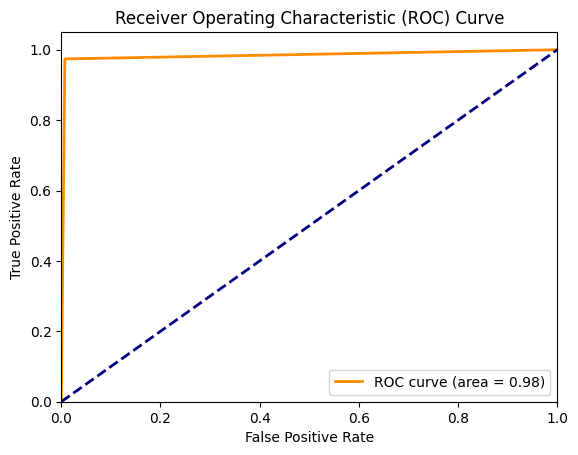

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, predictions) # calculate roc metrics
roc_auc = auc(fpr, tpr)

plt.figure() # plot roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()